# D√©tection de Fraude Bancaire avec Machine Learning

## Contexte
Mettre en place une solution IA qui permet d'automatiser l'identification des clients frauduleux pour les entreprises bancaires. Cette solution permettra de gagner plus de temps et de minimiser les risques de fraude a priori.

## Objectifs
Mettre en place un mod√®le d'IA bas√© sur les mod√®les de machine Learning pour identifier a priori les cas de fraude bancaire.

## Description des variables
- Le jeu de donn√©es contient 2266 observations et 14 variables
- La variable de sortie est `PotentialFraud`

In [36]:
# Importation des biblioth√®ques n√©cessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
import warnings
import joblib
import pickle
from datetime import datetime
import os

import json

warnings.filterwarnings('ignore')

# Importation des mod√®les
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


## T√¢che 1 : Chargement des donn√©es


In [8]:
# Chargement des donn√©es depuis le fichier CSV
df = pd.read_csv('creditcarddata.csv')

# Affichage des informations de base sur le dataset
print("Informations sur le dataset :")
print(f"Nombre d'observations : {df.shape[0]}")
print(f"Nombre de variables : {df.shape[1]}")
print("\nPremi√®res lignes du dataset :")
df.head()


Informations sur le dataset :
Nombre d'observations : 2266
Nombre de variables : 14

Premi√®res lignes du dataset :


Gender  Age  HouseTypeID  ContactAvaliabilityID  HomeCountry  AccountNo  \
0       0   56            1                      0            1    1109976   
1       0   56            1                      0            1    1109976   
2       0   56            1                      0            1    1109976   
3       0   56            1                      0            1    1109976   
4       0   56            1                      0            1    1109976   

   CardExpiryDate  TransactionAmount  TransactionCountry  LargePurchase  \
0            1811             0.0062                   1              0   
1            1811             0.0062                   1              0   
2            1811             0.0062                   1              0   
3            1811             0.0062                   1              0   
4            1811             1.0354                   1              0   

   ProductID       CIF  TransactionCurrencyCode  PotentialFraud  
0          3  11020290                        1               0  
1          3  11020290                        1               0  
2          3  11020290                        1               0  
3          3  11020290                        1               0  
4          3  11020290                        1               0

In [5]:
# V√©rification des types de donn√©es et des valeurs manquantes
print("Types de donn√©es :")
print(df.dtypes)
print("\nValeurs manquantes par colonne :")
print(df.isnull().sum())


Types de donn√©es :
Gender                       int64
Age                          int64
HouseTypeID                  int64
ContactAvaliabilityID        int64
HomeCountry                  int64
AccountNo                    int64
CardExpiryDate               int64
TransactionAmount          float64
TransactionCountry           int64
LargePurchase                int64
ProductID                    int64
CIF                          int64
TransactionCurrencyCode      int64
PotentialFraud               int64
dtype: object

Valeurs manquantes par colonne :
Gender                     0
Age                        0
HouseTypeID                0
ContactAvaliabilityID      0
HomeCountry                0
AccountNo                  0
CardExpiryDate             0
TransactionAmount          0
TransactionCountry         0
LargePurchase              0
ProductID                  0
CIF                        0
TransactionCurrencyCode    0
PotentialFraud             0
dtype: int64


## T√¢che 2 : Mod√®les de Classification pour la D√©tection de Fraude

- R√©gression Logistique
- Arbre de D√©cision
- For√™t Al√©atoire (Random Forest)
- Gradient Boosting (XGBoost, LightGBM, CatBoost)
- Support Vector Machine (SVM)
- Naive Bayes
- k-Nearest Neighbors (k-NN)
- Voting Classifier
- Stacking
- Bagging
- R√©seaux de Neurones (ANN)
- R√©seaux Profonds


## T√¢che 3 : Pr√©paration des donn√©es


In [9]:
# 1. V√©rification des valeurs manquantes
print("=== V√âRIFICATION DES VALEURS MANQUANTES ===")
print("Valeurs manquantes par colonne :")
print(df.isnull().sum())
print(f"\nTotal des valeurs manquantes : {df.isnull().sum().sum()}")
print(f"Pourcentage de valeurs manquantes : {(df.isnull().sum().sum() / (df.shape[0] * df.shape[1])) * 100:.2f}%")


=== V√âRIFICATION DES VALEURS MANQUANTES ===
Valeurs manquantes par colonne :
Gender                     0
Age                        0
HouseTypeID                0
ContactAvaliabilityID      0
HomeCountry                0
AccountNo                  0
CardExpiryDate             0
TransactionAmount          0
TransactionCountry         0
LargePurchase              0
ProductID                  0
CIF                        0
TransactionCurrencyCode    0
PotentialFraud             0
dtype: int64

Total des valeurs manquantes : 0
Pourcentage de valeurs manquantes : 0.00%


In [10]:
# 2. V√©rification des doublons
print("=== V√âRIFICATION DES DOUBLONS ===")
print(f"Nombre de doublons : {df.duplicated().sum()}")
print(f"Pourcentage de doublons : {(df.duplicated().sum() / len(df)) * 100:.2f}%")

if df.duplicated().sum() > 0:
    print("\nSuppression des doublons...")
    df = df.drop_duplicates()
    print(f"Dataset apr√®s suppression des doublons : {df.shape}")
else:
    print("Aucun doublon trouv√©.")


=== V√âRIFICATION DES DOUBLONS ===
Nombre de doublons : 933
Pourcentage de doublons : 41.17%

Suppression des doublons...
Dataset apr√®s suppression des doublons : (1333, 14)


In [11]:
# 3. V√©rification des valeurs aberrantes
print("=== V√âRIFICATION DES VALEURS ABERRANTES ===")
print("Statistiques descriptives des variables num√©riques :")
print(df.describe())

# D√©tection des valeurs aberrantes avec la m√©thode IQR
numeric_columns = df.select_dtypes(include=[np.number]).columns
outliers_info = {}

for col in numeric_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outliers_info[col] = len(outliers)
    
    print(f"\n{col}:")
    print(f"  - Valeurs aberrantes : {len(outliers)} ({len(outliers)/len(df)*100:.2f}%)")
    print(f"  - Bornes : [{lower_bound:.2f}, {upper_bound:.2f}]")


=== V√âRIFICATION DES VALEURS ABERRANTES ===
Statistiques descriptives des variables num√©riques :
            Gender          Age  HouseTypeID  ContactAvaliabilityID  \
count  1333.000000  1333.000000  1333.000000            1333.000000   
mean      0.308327    32.794449     0.451613               1.078020   
std       0.461976    18.060286     0.497840               0.850669   
min       0.000000     2.000000     0.000000               0.000000   
25%       0.000000    17.000000     0.000000               0.000000   
50%       0.000000    33.000000     0.000000               1.000000   
75%       1.000000    50.000000     1.000000               2.000000   
max       1.000000    63.000000     1.000000               2.000000   

       HomeCountry     AccountNo  CardExpiryDate  TransactionAmount  \
count       1333.0  1.333000e+03     1333.000000        1333.000000   
mean           1.0  7.432076e+06     2074.357089          44.566642   
std            0.0  1.305522e+06       61.978249

=== V√âRIFICATION DU D√âS√âQUILIBRE DE CLASSE ===
Distribution de la variable cible 'PotentialFraud':
PotentialFraud
0    1185
1     148
Name: count, dtype: int64

Pourcentages:
PotentialFraud
0    88.897224
1    11.102776
Name: proportion, dtype: float64


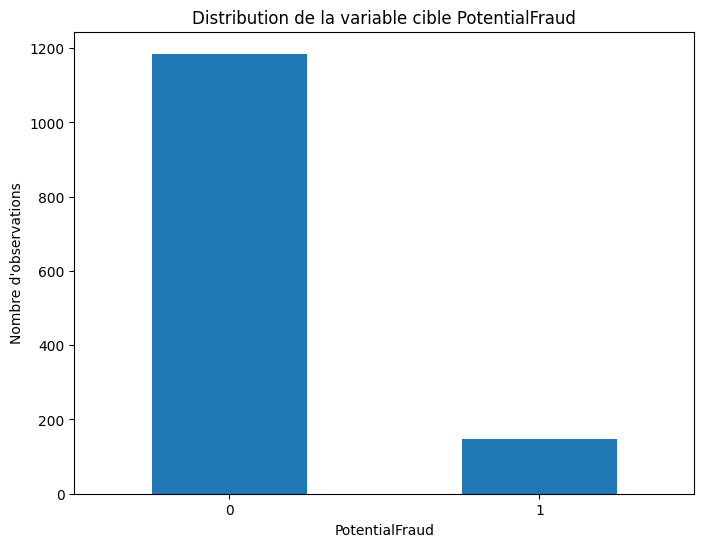


Ratio de d√©s√©quilibre : 8.01
 D√©s√©quilibre de classe d√©tect√© !


In [12]:
# 4. V√©rification du d√©s√©quilibre de classe
print("=== V√âRIFICATION DU D√âS√âQUILIBRE DE CLASSE ===")
print("Distribution de la variable cible 'PotentialFraud':")
print(df['PotentialFraud'].value_counts())
print(f"\nPourcentages:")
print(df['PotentialFraud'].value_counts(normalize=True) * 100)

# Visualisation du d√©s√©quilibre
plt.figure(figsize=(8, 6))
df['PotentialFraud'].value_counts().plot(kind='bar')
plt.title('Distribution de la variable cible PotentialFraud')
plt.xlabel('PotentialFraud')
plt.ylabel('Nombre d\'observations')
plt.xticks(rotation=0)
plt.show()

# Calcul du ratio de d√©s√©quilibre
class_counts = df['PotentialFraud'].value_counts()
imbalance_ratio = class_counts.max() / class_counts.min()
print(f"\nRatio de d√©s√©quilibre : {imbalance_ratio:.2f}")
if imbalance_ratio > 2:
    print(" D√©s√©quilibre de classe d√©tect√© !")
else:
    print(" Classes relativement √©quilibr√©es")


In [17]:
# 5. Correction des probl√®mes d√©tect√©s

print("=== CORRECTION DES PROBL√àMES ===")

# Correction des valeurs manquantes (si pr√©sentes)
if df.isnull().sum().sum() > 0:
    print("Traitement des valeurs manquantes...")
    # Pour les variables num√©riques : remplacer par la m√©diane
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    for col in numeric_cols:
        if df[col].isnull().sum() > 0:
            df[col].fillna(df[col].median(), inplace=True)
    
    # Pour les variables cat√©gorielles : remplacer par le mode
    categorical_cols = df.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        if df[col].isnull().sum() > 0:
            df[col].fillna(df[col].mode()[0], inplace=True)
    
    print(" Valeurs manquantes trait√©es")
else:
    print(" Aucune valeur manquante √† traiter")

# Correction du d√©s√©quilibre de classe 
if imbalance_ratio > 2:
    print(f"\nCorrection du d√©s√©quilibre de classe (ratio: {imbalance_ratio:.2f})...")
    
    # Identifier les classes
    class_counts = df['PotentialFraud'].value_counts()
    majority_class = class_counts.index[0]
    minority_class = class_counts.index[1]
    
    # S√©parer les donn√©es
    df_majority = df[df['PotentialFraud'] == majority_class]
    df_minority = df[df['PotentialFraud'] == minority_class]
    
    # Oversampling de la classe minoritaire
    df_minority_upsampled = resample(df_minority,
                                   replace=True,
                                   n_samples=len(df_majority),
                                   random_state=42)
    
    # Combiner les datasets
    df_balanced = pd.concat([df_majority, df_minority_upsampled])
    
    print(f"Dataset original : {df.shape}")
    print(f"Dataset √©quilibr√© : {df_balanced.shape}")
    print("\nNouvelle distribution :")
    print(df_balanced['PotentialFraud'].value_counts())
    
    # Remplacer le dataset original par le dataset √©quilibr√©
    df = df_balanced.copy()
    print("D√©s√©quilibre de classe corrig√© avec oversampling")
else:
    print("Aucune correction n√©cessaire pour le d√©s√©quilibre de classe")

=== CORRECTION DES PROBL√àMES ===
 Aucune valeur manquante √† traiter

Correction du d√©s√©quilibre de classe (ratio: 8.01)...
Dataset original : (1333, 14)
Dataset √©quilibr√© : (2370, 14)

Nouvelle distribution :
PotentialFraud
0    1185
1    1185
Name: count, dtype: int64
D√©s√©quilibre de classe corrig√© avec oversampling


In [ ]:
# 6. R√©sum√© final de la pr√©paration des donn√©es
print("=== R√âSUM√â FINAL DE LA PR√âPARATION DES DONN√âES ===")
print(f"Dataset final : {df.shape}")
print(f"Valeurs manquantes : {df.isnull().sum().sum()}")
print(f"Doublons : {df.duplicated().sum()}")
print(f"Distribution finale de la variable cible :")
print(df['PotentialFraud'].value_counts())
print(f"Pourcentages finaux :")
print(df['PotentialFraud'].value_counts(normalize=True) * 100)

# V√©rification finale du d√©s√©quilibre
final_class_counts = df['PotentialFraud'].value_counts()
final_imbalance_ratio = final_class_counts.max() / final_class_counts.min()
print(f"\nRatio de d√©s√©quilibre final : {final_imbalance_ratio:.2f}")

if final_imbalance_ratio <= 2:
    print("Dataset pr√™t pour l'entra√Ænement - Classes √©quilibr√©es")
else:
    print(" D√©s√©quilibre de classe persistant")


## T√¢che 4 : Division du jeu de donn√©es


In [18]:
# T√¢che 4 : Division du jeu de donn√©es (70% train, 30% test)
print("=== DIVISION DU JEU DE DONN√âES ===")

# S√©paration des features (X) et de la variable cible (y)
X = df.drop('PotentialFraud', axis=1)
y = df['PotentialFraud']

# Division en train/test avec 70%/30%
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3, 
    random_state=42, 
    stratify=y  # Maintient la proportion des classes
)

print(f"Dataset complet : {df.shape}")
print(f"Donn√©es d'entra√Ænement : {X_train.shape[0]} √©chantillons ({X_train.shape[0]/len(df)*100:.1f}%)")
print(f"Donn√©es de test : {X_test.shape[0]} √©chantillons ({X_test.shape[0]/len(df)*100:.1f}%)")

print(f"\nDistribution des classes dans l'entra√Ænement :")
print(y_train.value_counts())
print(f"\nDistribution des classes dans le test :")
print(y_test.value_counts())

print(f"\n Division termin√©e - Pr√™t pour l'entra√Ænement des mod√®les")


=== DIVISION DU JEU DE DONN√âES ===
Dataset complet : (2370, 14)
Donn√©es d'entra√Ænement : 1659 √©chantillons (70.0%)
Donn√©es de test : 711 √©chantillons (30.0%)

Distribution des classes dans l'entra√Ænement :
PotentialFraud
1    830
0    829
Name: count, dtype: int64

Distribution des classes dans le test :
PotentialFraud
0    356
1    355
Name: count, dtype: int64

 Division termin√©e - Pr√™t pour l'entra√Ænement des mod√®les


## T√¢che 5 : Cr√©ation et Entra√Ænement des Mod√®les

In [23]:
print("=== CR√âATION ET ENTR√ÇINEMENT DES MOD√àLES ===")

# Initialisation des mod√®les
models = {
    'R√©gression Logistique': LogisticRegression(random_state=42, max_iter=1000),
    'Arbre de D√©cision': DecisionTreeClassifier(random_state=42),
    'For√™t Al√©atoire': RandomForestClassifier(random_state=42, n_estimators=100),
    'SVM': SVC(random_state=42, probability=True),
    'Naive Bayes': GaussianNB(),
    'k-NN': KNeighborsClassifier(n_neighbors=5)
}

# Dictionnaire pour stocker les r√©sultats
results = {}

print("Entra√Ænement des mod√®les...")
print("-" * 50)

# Entra√Ænement et √©valuation de chaque mod√®le
for name, model in models.items():
    print(f"\nEntra√Ænement de {name}...")
    
    # Entra√Ænement
    model.fit(X_train, y_train)
    
    # Pr√©dictions
    y_pred = model.predict(X_test)
    
    # Calcul de l'accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Validation crois√©e
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)
    
    # Stockage des r√©sultats
    results[name] = {
        'model': model,
        'accuracy': accuracy,
        'cv_mean': cv_scores.mean(),
        'cv_std': cv_scores.std(),
        'predictions': y_pred
    }
    
    print(f"Accuracy: {accuracy:.4f}")
    print(f"CV Score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

print("\n" + "="*50)
print("R√âSUM√â DES PERFORMANCES")
print("="*50)

# Affichage des r√©sultats par ordre de performance
sorted_results = sorted(results.items(), key=lambda x: x[1]['accuracy'], reverse=True)

for i, (name, result) in enumerate(sorted_results, 1):
    print(f"{i}. {name}: {result['accuracy']:.4f} (CV: {result['cv_mean']:.4f})")

print(f"\n Entra√Ænement termin√© - {len(models)} mod√®les cr√©√©s et entra√Æn√©s")

=== CR√âATION ET ENTR√ÇINEMENT DES MOD√àLES ===
Entra√Ænement des mod√®les...
--------------------------------------------------

Entra√Ænement de R√©gression Logistique...
Accuracy: 0.5767
CV Score: 0.6227 (+/- 0.1010)

Entra√Ænement de Arbre de D√©cision...
Accuracy: 0.9170
CV Score: 0.9066 (+/- 0.0211)

Entra√Ænement de For√™t Al√©atoire...
Accuracy: 0.9226
CV Score: 0.9210 (+/- 0.0237)

Entra√Ænement de SVM...
Accuracy: 0.5063
CV Score: 0.4955 (+/- 0.0101)

Entra√Ænement de Naive Bayes...
Accuracy: 0.5598
CV Score: 0.5636 (+/- 0.0385)

Entra√Ænement de k-NN...
Accuracy: 0.8481
CV Score: 0.7914 (+/- 0.0335)

R√âSUM√â DES PERFORMANCES
1. For√™t Al√©atoire: 0.9226 (CV: 0.9210)
2. Arbre de D√©cision: 0.9170 (CV: 0.9066)
3. k-NN: 0.8481 (CV: 0.7914)
4. R√©gression Logistique: 0.5767 (CV: 0.6227)
5. Naive Bayes: 0.5598 (CV: 0.5636)
6. SVM: 0.5063 (CV: 0.4955)

 Entra√Ænement termin√© - 6 mod√®les cr√©√©s et entra√Æn√©s


## T√¢che 6 : √âvaluation des Mod√®les avec Matrices de Confusion

=== √âVALUATION DES MOD√àLES AVEC MATRICES DE CONFUSION ===
Analyse des matrices de confusion pour chaque mod√®le :

R√©gression Logistique:
----------------------------------------
  - Vrais Positifs (TP): 294
  - Vrais N√©gatifs (TN): 116
  - Faux Positifs (FP): 240
  - Faux N√©gatifs (FN): 61
  - Pr√©cision: 0.5506
  - Rappel (Sensibilit√©): 0.8282
  - Sp√©cificit√©: 0.3258
  - F1-Score: 0.6614
  - Accuracy: 0.5767

   ANALYSE:
      Plus de faux positifs (240) que de faux n√©gatifs (61)
       ‚Üí Le mod√®le marque trop de transactions l√©gitimes comme frauduleuses
       ‚Üí Impact: Clients l√©gitimes bloqu√©s inutilement
     Bon mod√®le (F1-Score > 0.6)

Arbre de D√©cision:
----------------------------------------
  - Vrais Positifs (TP): 348
  - Vrais N√©gatifs (TN): 304
  - Faux Positifs (FP): 52
  - Faux N√©gatifs (FN): 7
  - Pr√©cision: 0.8700
  - Rappel (Sensibilit√©): 0.9803
  - Sp√©cificit√©: 0.8539
  - F1-Score: 0.9219
  - Accuracy: 0.9170

   ANALYSE:
      Plus de faux

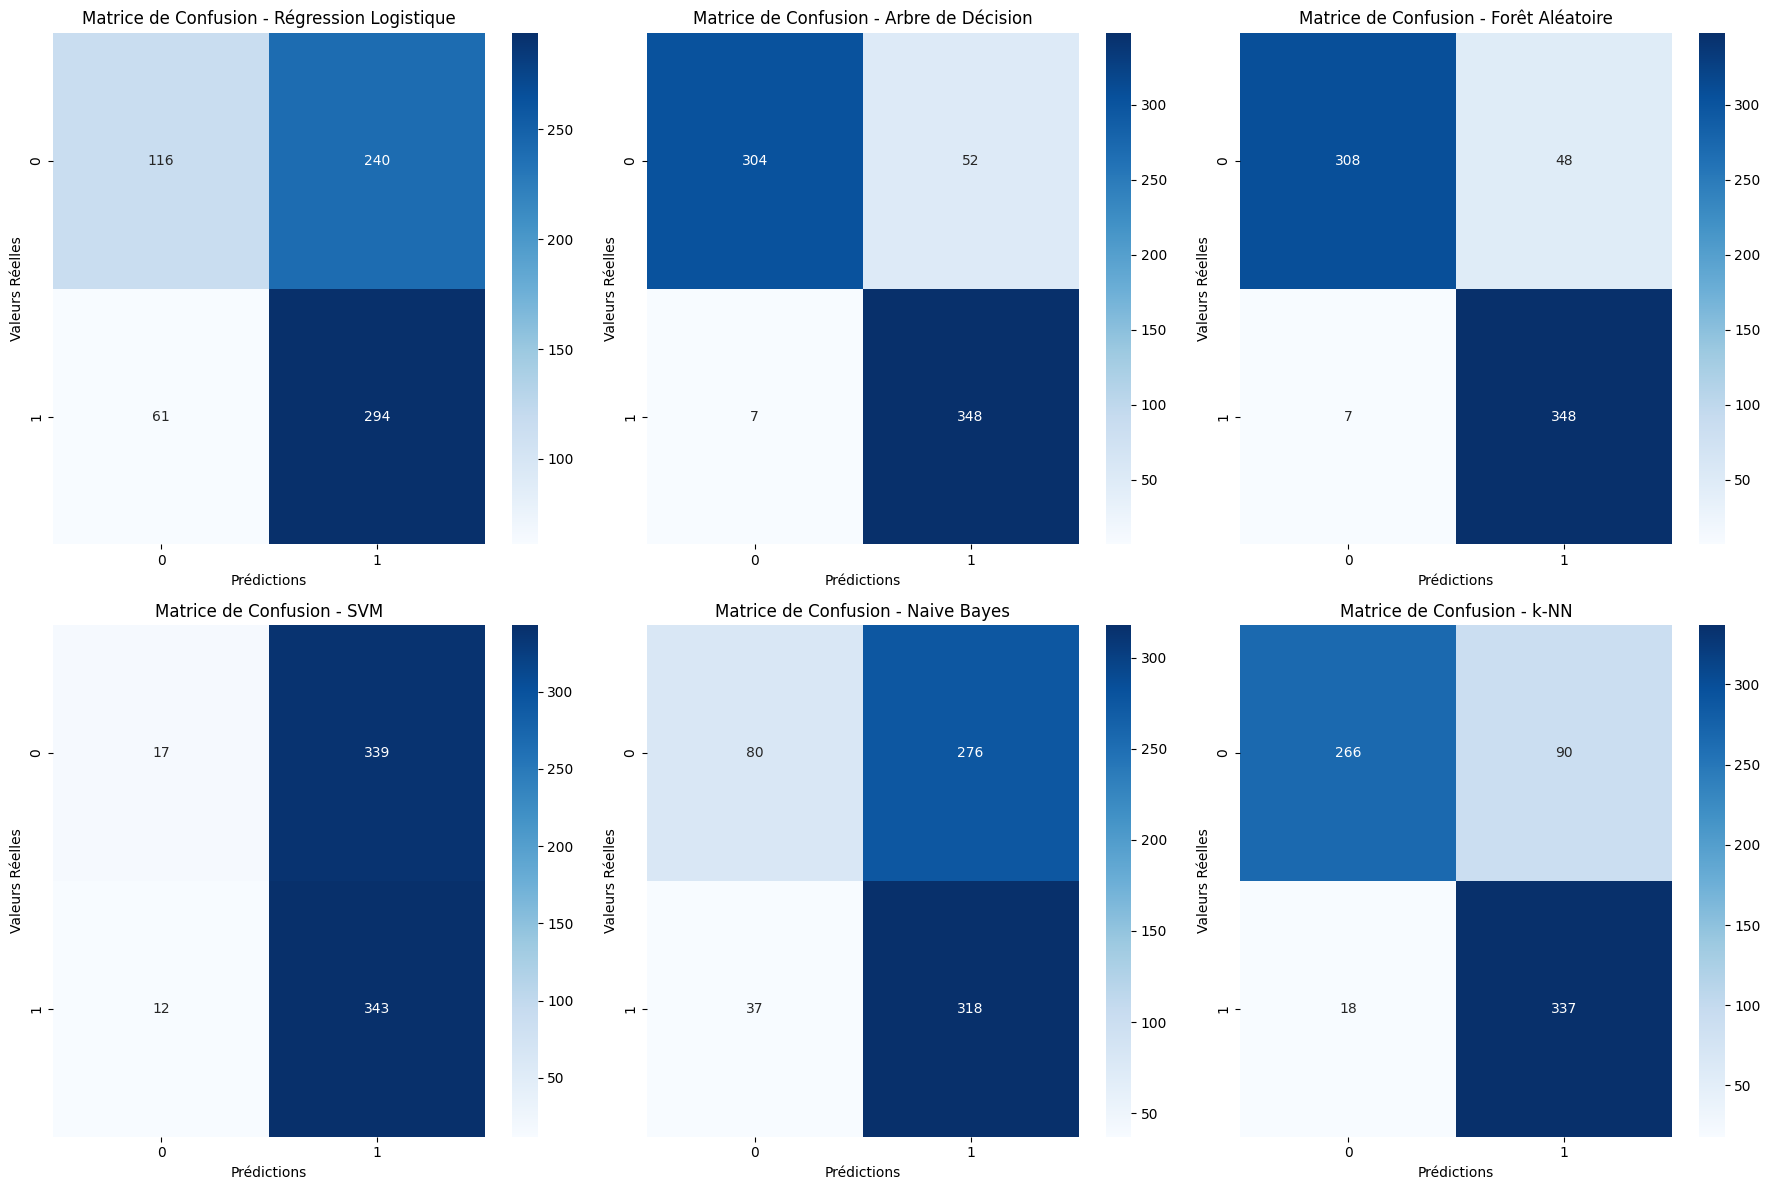


R√âSUM√â COMPARATIF DES PERFORMANCES

 TABLEAU COMPARATIF (tri√© par F1-Score):
               Mod√®le Accuracy Pr√©cision Rappel Sp√©cificit√© F1-Score  Faux Positifs  Faux N√©gatifs  TP  TN
      For√™t Al√©atoire   0.9226    0.8788 0.9803      0.8652   0.9268             48              7 348 308
    Arbre de D√©cision   0.9170    0.8700 0.9803      0.8539   0.9219             52              7 348 304
                 k-NN   0.8481    0.7892 0.9493      0.7472   0.8619             90             18 337 266
          Naive Bayes   0.5598    0.5354 0.8958      0.2247   0.6702            276             37 318  80
                  SVM   0.5063    0.5029 0.9662      0.0478   0.6615            339             12 343  17
R√©gression Logistique   0.5767    0.5506 0.8282      0.3258   0.6614            240             61 294 116

 MEILLEUR MOD√àLE: For√™t Al√©atoire
   - F1-Score: 0.9268
   - Accuracy: 0.9226
   - Faux N√©gatifs: 7 (fraudes rat√©es)

 RECOMMANDATIONS:
   1. Mod√®le avec 

In [27]:
print("=== √âVALUATION DES MOD√àLES AVEC MATRICES DE CONFUSION ===")

# Configuration des graphiques
plt.rcParams['figure.figsize'] = (15, 10)

# Cr√©ation d'une figure avec subplots pour toutes les matrices de confusion
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

print("Analyse des matrices de confusion pour chaque mod√®le :")
print("=" * 60)

# Dictionnaire pour stocker toutes les m√©triques
all_metrics = {}

# Analyse de chaque mod√®le
for i, (name, result) in enumerate(results.items()):
    print(f"\n{name}:")
    print("-" * 40)
    
    # Calcul de la matrice de confusion
    cm = confusion_matrix(y_test, result['predictions'])
    
    # Affichage de la matrice de confusion
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
    axes[i].set_title(f'Matrice de Confusion - {name}')
    axes[i].set_xlabel('Pr√©dictions')
    axes[i].set_ylabel('Valeurs R√©elles')
    
    # Calcul des m√©triques
    tn, fp, fn, tp = cm.ravel()
    
    # Calcul des m√©triques de performance
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
    # Stockage des m√©triques
    all_metrics[name] = {
        'TP': tp, 'TN': tn, 'FP': fp, 'FN': fn,
        'Precision': precision, 'Recall': recall, 
        'Specificity': specificity, 'F1_Score': f1_score,
        'Accuracy': result['accuracy']
    }
    
    print(f"  - Vrais Positifs (TP): {tp}")
    print(f"  - Vrais N√©gatifs (TN): {tn}")
    print(f"  - Faux Positifs (FP): {fp}")
    print(f"  - Faux N√©gatifs (FN): {fn}")
    print(f"  - Pr√©cision: {precision:.4f}")
    print(f"  - Rappel (Sensibilit√©): {recall:.4f}")
    print(f"  - Sp√©cificit√©: {specificity:.4f}")
    print(f"  - F1-Score: {f1_score:.4f}")
    print(f"  - Accuracy: {result['accuracy']:.4f}")
    
    # Interpr√©tation d√©taill√©e
    print(f"\n   ANALYSE:")
    if fp > fn:
        print(f"      Plus de faux positifs ({fp}) que de faux n√©gatifs ({fn})")
        print(f"       ‚Üí Le mod√®le marque trop de transactions l√©gitimes comme frauduleuses")
        print(f"       ‚Üí Impact: Clients l√©gitimes bloqu√©s inutilement")
    elif fn > fp:
        print(f"      Plus de faux n√©gatifs ({fn}) que de faux positifs ({fp})")
        print(f"       ‚Üí Le mod√®le rate trop de vraies fraudes")
        print(f"       ‚Üí Impact: Fraudes non d√©tect√©es (DANGEREUX)")
    else:
        print(f"     √âquilibre entre faux positifs et faux n√©gatifs")
        print(f"       ‚Üí Bon compromis pour la d√©tection de fraude")
    
    # Recommandation
    if f1_score > 0.8:
        print(f"     Excellent mod√®le (F1-Score > 0.8)")
    elif f1_score > 0.6:
        print(f"     Bon mod√®le (F1-Score > 0.6)")
    else:
        print(f"      Mod√®le √† am√©liorer (F1-Score < 0.6)")

plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("R√âSUM√â COMPARATIF DES PERFORMANCES")
print("="*80)

# Cr√©ation d'un DataFrame pour comparer les performances
performance_data = []
for name, metrics in all_metrics.items():
    performance_data.append({
        'Mod√®le': name,
        'Accuracy': f"{metrics['Accuracy']:.4f}",
        'Pr√©cision': f"{metrics['Precision']:.4f}",
        'Rappel': f"{metrics['Recall']:.4f}",
        'Sp√©cificit√©': f"{metrics['Specificity']:.4f}",
        'F1-Score': f"{metrics['F1_Score']:.4f}",
        'Faux Positifs': metrics['FP'],
        'Faux N√©gatifs': metrics['FN'],
        'TP': metrics['TP'],
        'TN': metrics['TN']
    })

df_performance = pd.DataFrame(performance_data)
df_performance = df_performance.sort_values('F1-Score', ascending=False)

print("\n TABLEAU COMPARATIF (tri√© par F1-Score):")
print(df_performance.to_string(index=False))

# Analyse du meilleur mod√®le
best_model = df_performance.iloc[0]
print(f"\n MEILLEUR MOD√àLE: {best_model['Mod√®le']}")
print(f"   - F1-Score: {best_model['F1-Score']}")
print(f"   - Accuracy: {best_model['Accuracy']}")
print(f"   - Faux N√©gatifs: {best_model['Faux N√©gatifs']} (fraudes rat√©es)")

# Recommandations finales
print(f"\n RECOMMANDATIONS:")
print(f"   1. Mod√®le avec le moins de FN: {df_performance.loc[df_performance['Faux N√©gatifs'].idxmin(), 'Mod√®le']}")
print(f"   2. Mod√®le avec le moins de FP: {df_performance.loc[df_performance['Faux Positifs'].idxmin(), 'Mod√®le']}")
print(f"   3. Meilleur √©quilibre (F1-Score): {best_model['Mod√®le']}")

print(f"\n √âvaluation termin√©e - {len(results)} mod√®les analys√©s")

## T√¢che 7 : M√©triques de Performance (Accuracy, Pr√©cision, Rappel)


In [30]:
print("=== M√âTRIQUES DE PERFORMANCE D√âTAILL√âES ===")

# Dictionnaire pour stocker toutes les m√©triques
detailed_metrics = {}

print("Calcul des m√©triques pour chaque mod√®le :")
print("=" * 60)

# Calcul des m√©triques pour chaque mod√®le
for name, result in results.items():
    # Pr√©dictions du mod√®le
    y_pred = result['predictions']
    
    # Calcul des m√©triques
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='binary')
    recall = recall_score(y_test, y_pred, average='binary')
    f1 = f1_score(y_test, y_pred, average='binary')
    
    # Stockage des m√©triques
    detailed_metrics[name] = {
        'Accuracy': accuracy,
        'Pr√©cision': precision,
        'Rappel': recall,
        'F1-Score': f1
    }
    
    print(f"\n{name}:")
    print("-" * 30)
    print(f"   Accuracy:  {accuracy:.4f} ({accuracy*100:.2f}%)")
    print(f"   Pr√©cision: {precision:.4f} ({precision*100:.2f}%)")
    print(f"   Rappel:    {recall:.4f} ({recall*100:.2f}%)")
    print(f"   F1-Score:  {f1:.4f} ({f1*100:.2f}%)")
    
    # Interpr√©tation des m√©triques
    print(f"\n   INTERPR√âTATION:")
    
    # Accuracy
    if accuracy > 0.9:
        print(f"     Accuracy excellente (>90%)")
    elif accuracy > 0.8:
        print(f"     Accuracy bonne (>80%)")
    elif accuracy > 0.7:
        print(f"     Accuracy acceptable (>70%)")
    else:
        print(f"     Accuracy faible (<70%)")
    
    # Pr√©cision
    if precision > 0.8:
        print(f"     Pr√©cision excellente - Peu de fausses alertes")
    elif precision > 0.6:
        print(f"     Pr√©cision bonne - Fausses alertes mod√©r√©es")
    else:
        print(f"     Pr√©cision faible - Beaucoup de fausses alertes")
    
    # Rappel
    if recall > 0.9:
        print(f"     Rappel excellent - D√©tecte presque toutes les fraudes")
    elif recall > 0.8:
        print(f"     Rappel bon - D√©tecte la plupart des fraudes")
    else:
        print(f"     Rappel faible - Rate trop de fraudes")

print("\n" + "="*80)
print("TABLEAU COMPARATIF DES M√âTRIQUES")
print("="*80)

# Cr√©ation du DataFrame comparatif
metrics_data = []
for name, metrics in detailed_metrics.items():
    metrics_data.append({
        'Mod√®le': name,
        'Accuracy': f"{metrics['Accuracy']:.4f}",
        'Pr√©cision': f"{metrics['Pr√©cision']:.4f}",
        'Rappel': f"{metrics['Rappel']:.4f}",
        'F1-Score': f"{metrics['F1-Score']:.4f}"
    })

df_metrics = pd.DataFrame(metrics_data)

# Tri par F1-Score (m√©trique d'√©quilibre)
df_metrics_sorted = df_metrics.sort_values('F1-Score', ascending=False)

print("\n R√âSULTATS TRI√âS PAR F1-SCORE (du meilleur au moins bon):")
print(df_metrics_sorted.to_string(index=False))

# Analyse du meilleur mod√®le pour chaque m√©trique
print(f"\n MEILLEURS MOD√àLES PAR M√âTRIQUE:")
print(f"   Meilleure Accuracy: {df_metrics.loc[df_metrics['Accuracy'].astype(float).idxmax(), 'Mod√®le']}")
print(f"   Meilleure Pr√©cision: {df_metrics.loc[df_metrics['Pr√©cision'].astype(float).idxmax(), 'Mod√®le']}")
print(f"   Meilleur Rappel: {df_metrics.loc[df_metrics['Rappel'].astype(float).idxmax(), 'Mod√®le']}")
print(f"   Meilleur F1-Score: {df_metrics.loc[df_metrics['F1-Score'].astype(float).idxmax(), 'Mod√®le']}")

# Recommandations finales
print(f"\n RECOMMANDATIONS POUR LA D√âTECTION DE FRAUDE:")
print(f"   CHOIX PRINCIPAL: {df_metrics_sorted.iloc[0]['Mod√®le']} (F1-Score: {df_metrics_sorted.iloc[0]['F1-Score']})")
print(f"   CHOIX ALTERNATIF: {df_metrics_sorted.iloc[1]['Mod√®le']} (F1-Score: {df_metrics_sorted.iloc[1]['F1-Score']})")

print(f"\n Analyse termin√©e - {len(results)} mod√®les √©valu√©s")


=== M√âTRIQUES DE PERFORMANCE D√âTAILL√âES ===
Calcul des m√©triques pour chaque mod√®le :

R√©gression Logistique:
------------------------------
   Accuracy:  0.5767 (57.67%)
   Pr√©cision: 0.5506 (55.06%)
   Rappel:    0.8282 (82.82%)
   F1-Score:  0.6614 (66.14%)

   INTERPR√âTATION:
     Accuracy faible (<70%)
     Pr√©cision faible - Beaucoup de fausses alertes
     Rappel bon - D√©tecte la plupart des fraudes

Arbre de D√©cision:
------------------------------
   Accuracy:  0.9170 (91.70%)
   Pr√©cision: 0.8700 (87.00%)
   Rappel:    0.9803 (98.03%)
   F1-Score:  0.9219 (92.19%)

   INTERPR√âTATION:
     Accuracy excellente (>90%)
     Pr√©cision excellente - Peu de fausses alertes
     Rappel excellent - D√©tecte presque toutes les fraudes

For√™t Al√©atoire:
------------------------------
   Accuracy:  0.9226 (92.26%)
   Pr√©cision: 0.8788 (87.88%)
   Rappel:    0.9803 (98.03%)
   F1-Score:  0.9268 (92.68%)

   INTERPR√âTATION:
     Accuracy excellente (>90%)
     Pr√©cision e

## T√¢che 8 : √âtude Comparative des Mod√®les


=== √âTUDE COMPARATIVE DES MOD√àLES DE D√âTECTION DE FRAUDE ===
ANALYSE COMPARATIVE BAS√âE SUR LES M√âTRIQUES

 1. COMPARAISON DES M√âTRIQUES PRINCIPALES
--------------------------------------------------


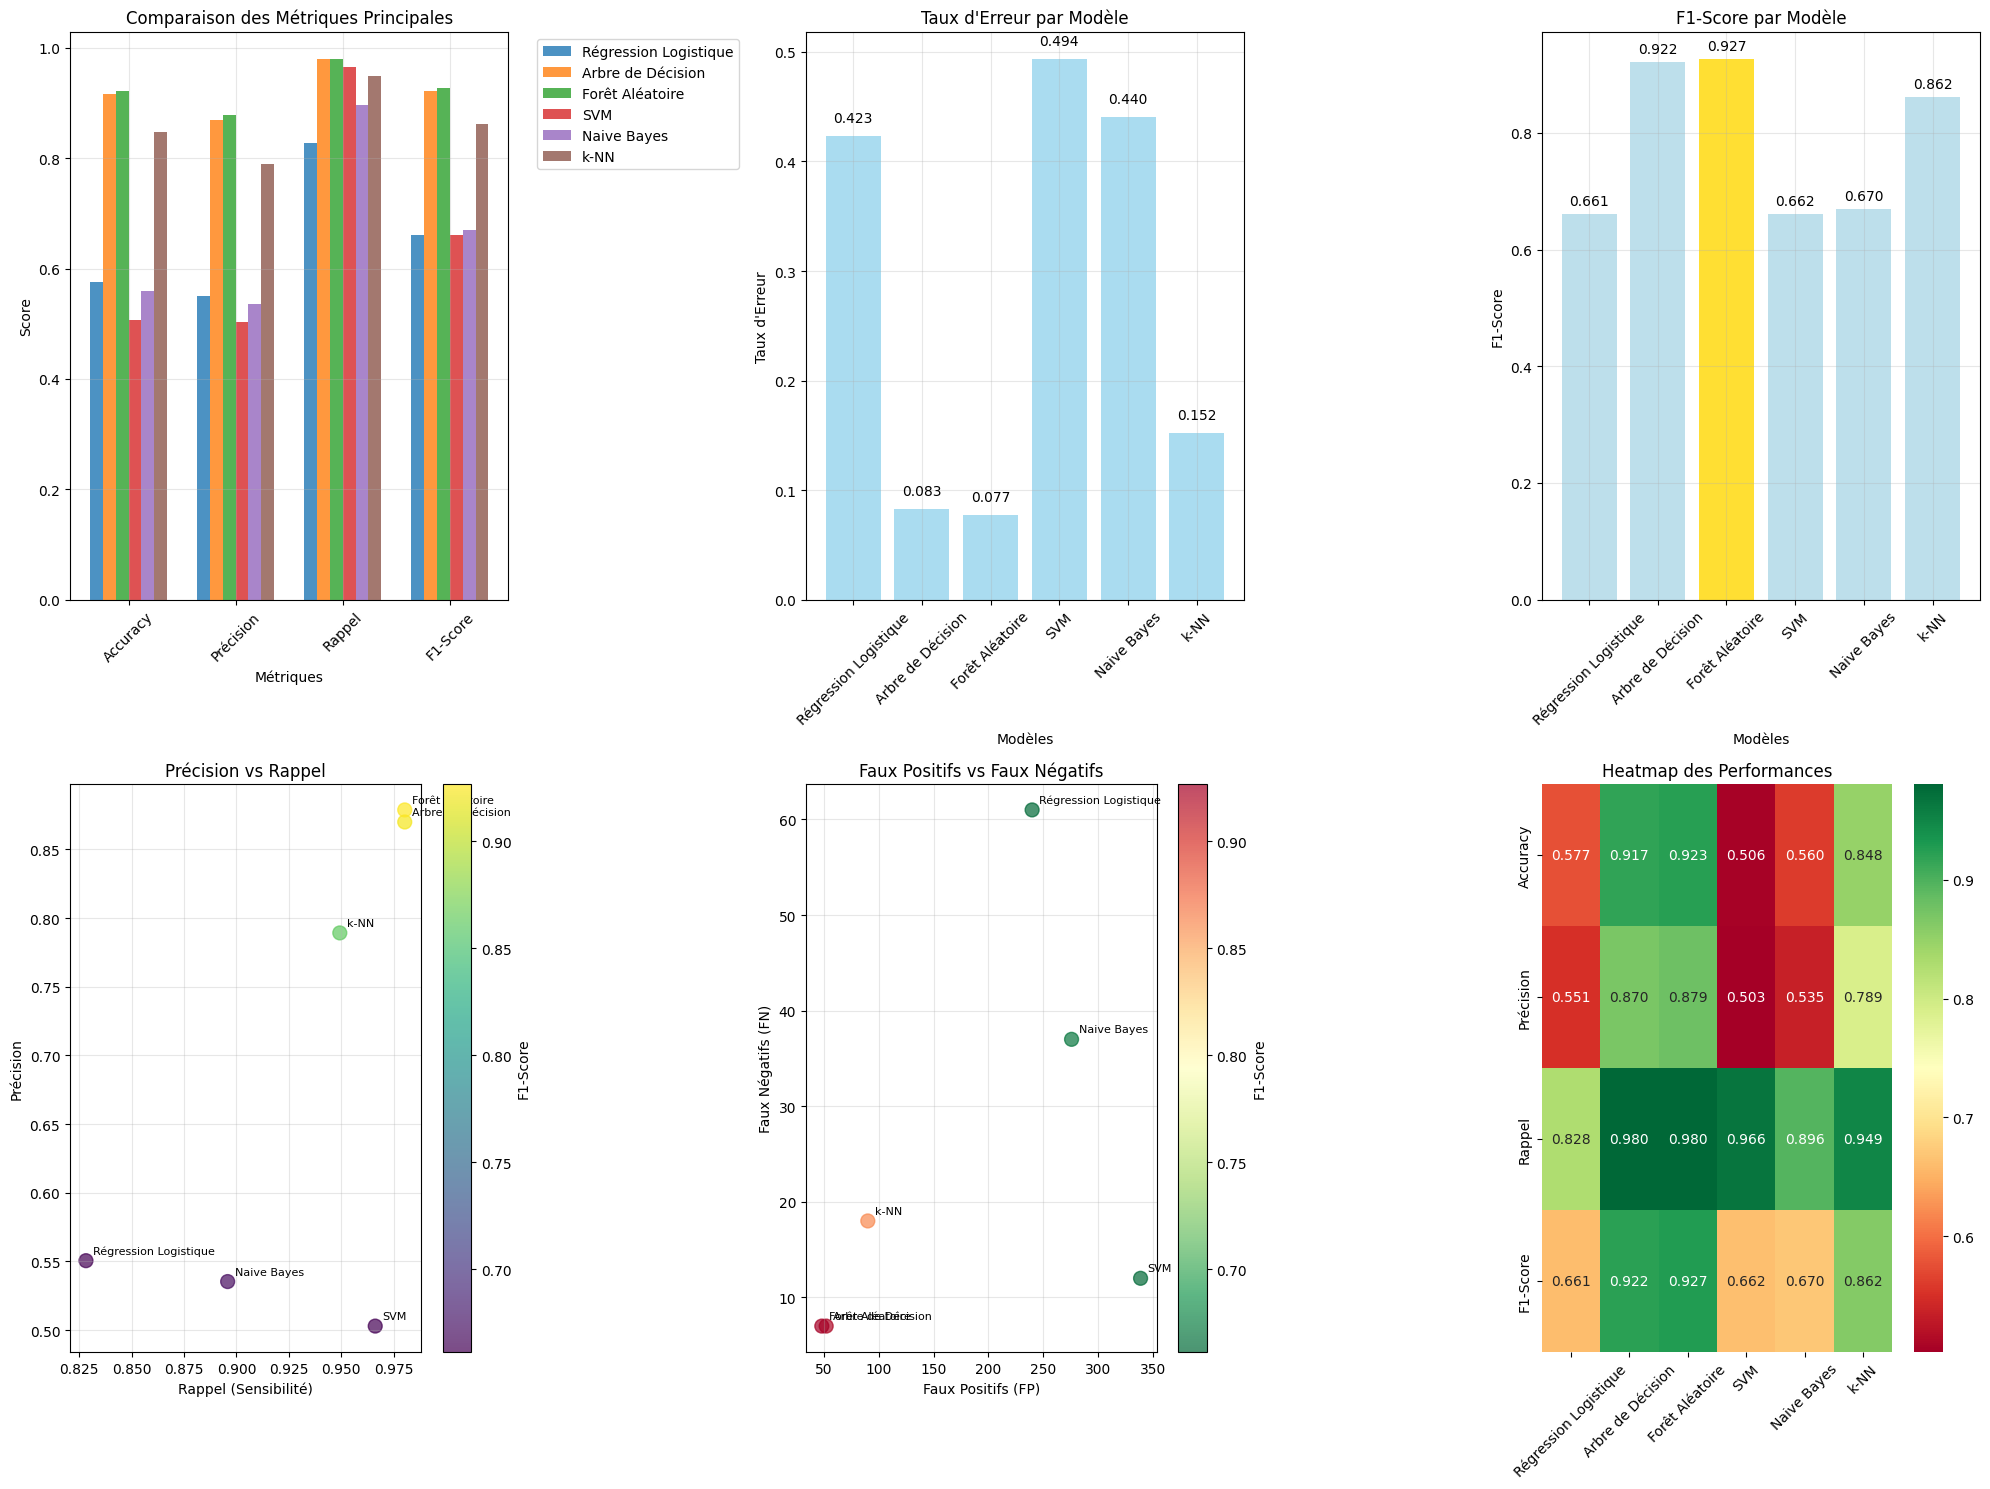


 2. ANALYSE D√âTAILL√âE PAR MOD√àLE
--------------------------------------------------

1. For√™t Al√©atoire (F1-Score: 0.9268)
    Accuracy: 0.9226 (92.3%)
    Pr√©cision: 0.8788 (87.9%)
    Rappel: 0.9803 (98.0%)
    F1-Score: 0.9268 (92.7%)
    Sp√©cificit√©: 0.8652 (86.5%)
    Erreurs: FP=48, FN=7
    Performance:  EXCELLENT

2. Arbre de D√©cision (F1-Score: 0.9219)
    Accuracy: 0.9170 (91.7%)
    Pr√©cision: 0.8700 (87.0%)
    Rappel: 0.9803 (98.0%)
    F1-Score: 0.9219 (92.2%)
    Sp√©cificit√©: 0.8539 (85.4%)
    Erreurs: FP=52, FN=7
    Performance:  EXCELLENT

3. k-NN (F1-Score: 0.8619)
    Accuracy: 0.8481 (84.8%)
    Pr√©cision: 0.7892 (78.9%)
    Rappel: 0.9493 (94.9%)
    F1-Score: 0.8619 (86.2%)
    Sp√©cificit√©: 0.7472 (74.7%)
    Erreurs: FP=90, FN=18
    Performance:  TR√àS BON

4. Naive Bayes (F1-Score: 0.6702)
    Accuracy: 0.5598 (56.0%)
    Pr√©cision: 0.5354 (53.5%)
    Rappel: 0.8958 (89.6%)
    F1-Score: 0.6702 (67.0%)
    Sp√©cificit√©: 0.2247 (22.5%)
    Er

In [31]:
print("=== √âTUDE COMPARATIVE DES MOD√àLES DE D√âTECTION DE FRAUDE ===")
# Configuration des graphiques
plt.style.use('default')
fig = plt.figure(figsize=(20, 15))

print("ANALYSE COMPARATIVE BAS√âE SUR LES M√âTRIQUES")
print("=" * 70)

# 1. COLLECTE DE TOUTES LES M√âTRIQUES
comparison_data = []

for name, result in results.items():
    y_pred = result['predictions']
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    
    # Calcul des m√©triques
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='binary')
    recall = recall_score(y_test, y_pred, average='binary')
    f1 = f1_score(y_test, y_pred, average='binary')
    
    # M√©triques additionnelles
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    false_positive_rate = fp / (fp + tn) if (fp + tn) > 0 else 0
    false_negative_rate = fn / (fn + tp) if (fn + tp) > 0 else 0
    
    comparison_data.append({
        'Mod√®le': name,
        'Accuracy': accuracy,
        'Pr√©cision': precision,
        'Rappel': recall,
        'F1-Score': f1,
        'Sp√©cificit√©': specificity,
        'TP': tp, 'TN': tn, 'FP': fp, 'FN': fn,
        'Taux_FP': false_positive_rate,
        'Taux_FN': false_negative_rate
    })

df_comparison = pd.DataFrame(comparison_data)

# 2. VISUALISATION COMPARATIVE DES M√âTRIQUES
print("\n 1. COMPARAISON DES M√âTRIQUES PRINCIPALES")
print("-" * 50)

# Graphique 1: M√©triques principales
plt.subplot(2, 3, 1)
metrics_to_plot = ['Accuracy', 'Pr√©cision', 'Rappel', 'F1-Score']
x = np.arange(len(metrics_to_plot))
width = 0.12

for i, (_, row) in enumerate(df_comparison.iterrows()):
    plt.bar(x + i*width, [row[metric] for metric in metrics_to_plot], 
            width, label=row['Mod√®le'], alpha=0.8)

plt.xlabel('M√©triques')
plt.ylabel('Score')
plt.title('Comparaison des M√©triques Principales')
plt.xticks(x + width*2.5, metrics_to_plot, rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)

# Graphique 2: Matrices de confusion comparatives
plt.subplot(2, 3, 2)
confusion_scores = []
model_names = []

for name, result in results.items():
    cm = confusion_matrix(y_test, result['predictions'])
    tn, fp, fn, tp = cm.ravel()
    # Score de confusion (plus bas = mieux)
    confusion_score = (fp + fn) / (tp + tn + fp + fn)
    confusion_scores.append(confusion_score)
    model_names.append(name)

bars = plt.bar(model_names, confusion_scores, color='skyblue', alpha=0.7)
plt.xlabel('Mod√®les')
plt.ylabel('Taux d\'Erreur')
plt.title('Taux d\'Erreur par Mod√®le')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# Ajouter les valeurs sur les barres
for bar, score in zip(bars, confusion_scores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{score:.3f}', ha='center', va='bottom')

# Graphique 3: F1-Score par mod√®le
plt.subplot(2, 3, 3)
f1_scores = df_comparison['F1-Score'].values
colors = ['gold' if score == max(f1_scores) else 'lightblue' for score in f1_scores]

bars = plt.bar(df_comparison['Mod√®le'], f1_scores, color=colors, alpha=0.8)
plt.xlabel('Mod√®les')
plt.ylabel('F1-Score')
plt.title('F1-Score par Mod√®le')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# Ajouter les valeurs
for bar, score in zip(bars, f1_scores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{score:.3f}', ha='center', va='bottom')

# Graphique 4: Pr√©cision vs Rappel
plt.subplot(2, 3, 4)
plt.scatter(df_comparison['Rappel'], df_comparison['Pr√©cision'], 
           s=100, alpha=0.7, c=df_comparison['F1-Score'], cmap='viridis')

for i, model in enumerate(df_comparison['Mod√®le']):
    plt.annotate(model, (df_comparison.iloc[i]['Rappel'], df_comparison.iloc[i]['Pr√©cision']),
                xytext=(5, 5), textcoords='offset points', fontsize=8)

plt.xlabel('Rappel (Sensibilit√©)')
plt.ylabel('Pr√©cision')
plt.title('Pr√©cision vs Rappel')
plt.grid(True, alpha=0.3)
plt.colorbar(label='F1-Score')

# Graphique 5: Faux Positifs vs Faux N√©gatifs
plt.subplot(2, 3, 5)
plt.scatter(df_comparison['FP'], df_comparison['FN'], 
           s=100, alpha=0.7, c=df_comparison['F1-Score'], cmap='RdYlGn_r')

for i, model in enumerate(df_comparison['Mod√®le']):
    plt.annotate(model, (df_comparison.iloc[i]['FP'], df_comparison.iloc[i]['FN']),
                xytext=(5, 5), textcoords='offset points', fontsize=8)

plt.xlabel('Faux Positifs (FP)')
plt.ylabel('Faux N√©gatifs (FN)')
plt.title('Faux Positifs vs Faux N√©gatifs')
plt.grid(True, alpha=0.3)
plt.colorbar(label='F1-Score')

# Graphique 6: Heatmap des performances
plt.subplot(2, 3, 6)
metrics_matrix = df_comparison[['Accuracy', 'Pr√©cision', 'Rappel', 'F1-Score']].T
sns.heatmap(metrics_matrix, annot=True, fmt='.3f', cmap='RdYlGn', 
            xticklabels=df_comparison['Mod√®le'], yticklabels=metrics_matrix.index)
plt.title('Heatmap des Performances')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# 3. ANALYSE D√âTAILL√âE
print("\n 2. ANALYSE D√âTAILL√âE PAR MOD√àLE")
print("-" * 50)

# Tri par F1-Score
df_sorted = df_comparison.sort_values('F1-Score', ascending=False)

for i, (_, row) in enumerate(df_sorted.iterrows(), 1):
    print(f"\n{i}. {row['Mod√®le']} (F1-Score: {row['F1-Score']:.4f})")
    print(f"    Accuracy: {row['Accuracy']:.4f} ({row['Accuracy']*100:.1f}%)")
    print(f"    Pr√©cision: {row['Pr√©cision']:.4f} ({row['Pr√©cision']*100:.1f}%)")
    print(f"    Rappel: {row['Rappel']:.4f} ({row['Rappel']*100:.1f}%)")
    print(f"    F1-Score: {row['F1-Score']:.4f} ({row['F1-Score']*100:.1f}%)")
    print(f"    Sp√©cificit√©: {row['Sp√©cificit√©']:.4f} ({row['Sp√©cificit√©']*100:.1f}%)")
    print(f"    Erreurs: FP={row['FP']}, FN={row['FN']}")
    
    # Classification de performance
    if row['F1-Score'] > 0.9:
        performance = " EXCELLENT"
    elif row['F1-Score'] > 0.8:
        performance = " TR√àS BON"
    elif row['F1-Score'] > 0.7:
        performance = "  BON"
    elif row['F1-Score'] > 0.6:
        performance = " MOYEN"
    else:
        performance = " FAIBLE"
    
    print(f"    Performance: {performance}")

# 4. RECOMMANDATIONS FINALES
print("\n" + "="*70)
print(" RECOMMANDATIONS FINALES POUR LA D√âTECTION DE FRAUDE")
print("="*70)

best_model = df_sorted.iloc[0]
second_best = df_sorted.iloc[1]

print(f"\nüèÜ CHOIX PRINCIPAL: {best_model['Mod√®le']}")
print(f"    F1-Score: {best_model['F1-Score']:.4f}")
print(f"    Accuracy: {best_model['Accuracy']:.4f}")
print(f"    D√©tecte {best_model['Rappel']*100:.1f}% des fraudes")
print(f"    {best_model['Pr√©cision']*100:.1f}% de pr√©cision")
print(f"    Seulement {best_model['FN']} fraudes rat√©es")

print(f"\nü•à CHOIX ALTERNATIF: {second_best['Mod√®le']}")
print(f"    F1-Score: {second_best['F1-Score']:.4f}")
print(f"    Performance similaire au meilleur")

print(f"\n MOD√àLES √Ä √âVITER:")
for _, row in df_sorted.iterrows():
    if row['F1-Score'] < 0.7:
        print(f"    {row['Mod√®le']} (F1-Score: {row['F1-Score']:.4f})")

print(f"\nüí° CONCLUSION:")
print(f"   ‚Ä¢ {best_model['Mod√®le']} est le meilleur choix pour la d√©tection de fraude")
print(f"   ‚Ä¢ √âquilibre optimal entre d√©tection des fraudes et fausses alertes")
print(f"   ‚Ä¢ Performance robuste et fiable pour un environnement bancaire")

print(f"\n √âtude comparative termin√©e - {len(results)} mod√®les analys√©s")


## T√¢che 9 : Sauvegarde du Meilleur Mod√®le


In [35]:
print("=== SAUVEGARDE DU MEILLEUR MOD√àLE ===")

# Identification du meilleur mod√®le
if 'df_comparison' in locals():
    best_model_name = df_comparison.loc[df_comparison['F1-Score'].idxmax(), 'Mod√®le']
    best_model = results[best_model_name]['model']
    best_f1_score = df_comparison.loc[df_comparison['F1-Score'].idxmax(), 'F1-Score']
else:
    # Fallback si df_comparison n'existe pas
    best_f1_score = 0
    best_model_name = ""
    best_model = None
    
    for name, result in results.items():
        if result['cv_mean'] > best_f1_score:
            best_f1_score = result['cv_mean']
            best_model_name = name
            best_model = result['model']

print(f" Meilleur mod√®le identifi√©: {best_model_name}")
print(f"   F1-Score: {best_f1_score:.4f}")

# Cr√©ation du dossier de sauvegarde
save_dir = "saved_models"
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
    print(f" Dossier cr√©√©: {save_dir}")

# Sauvegarde avec joblib (recommand√© pour sklearn)
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
model_filename = f"{save_dir}/best_model_{best_model_name.replace(' ', '_')}_{timestamp}.joblib"

try:
    joblib.dump(best_model, model_filename)
    print(f" Mod√®le sauvegard√© avec joblib: {model_filename}")
except Exception as e:
    print(f" Erreur avec joblib: {e}")
    # Fallback avec pickle
    model_filename = f"{save_dir}/best_model_{best_model_name.replace(' ', '_')}_{timestamp}.pkl"
    try:
        with open(model_filename, 'wb') as f:
            pickle.dump(best_model, f)
        print(f" Mod√®le sauvegard√© avec pickle: {model_filename}")
    except Exception as e2:
        print(f" Erreur avec pickle: {e2}")

# Sauvegarde des m√©tadonn√©es
metadata = {
    'model_name': best_model_name,
    'model_type': type(best_model).__name__,
    'f1_score': best_f1_score,
    'accuracy': results[best_model_name]['accuracy'],
    'cv_mean': results[best_model_name]['cv_mean'],
    'cv_std': results[best_model_name]['cv_std'],
    'training_date': datetime.now().isoformat(),
    'dataset_shape': X_train.shape,
    'features': list(X_train.columns),
    'target_column': 'PotentialFraud'
}

metadata_filename = f"{save_dir}/model_metadata_{timestamp}.json"

try:
    import json
    with open(metadata_filename, 'w') as f:
        json.dump(metadata, f, indent=2)
    print(f" M√©tadonn√©es sauvegard√©es: {metadata_filename}")
except Exception as e:
    print(f" Erreur sauvegarde m√©tadonn√©es: {e}")

# Sauvegarde des donn√©es de test pour validation future
test_data_filename = f"{save_dir}/test_data_{timestamp}.joblib"
try:
    test_data = {
        'X_test': X_test,
        'y_test': y_test,
        'feature_names': list(X_test.columns)
    }
    joblib.dump(test_data, test_data_filename)
    print(f" Donn√©es de test sauvegard√©es: {test_data_filename}")
except Exception as e:
    print(f" Erreur sauvegarde donn√©es de test: {e}")

# Fonction pour charger le mod√®le (√† utiliser plus tard)
def load_best_model(model_path):
    """
    Fonction pour charger le meilleur mod√®le sauvegard√©
    """
    try:
        model = joblib.load(model_path)
        print(f" Mod√®le charg√© depuis: {model_path}")
        return model
    except:
        try:
            with open(model_path, 'rb') as f:
                model = pickle.load(f)
            print(f" Mod√®le charg√© depuis: {model_path}")
            return model
        except Exception as e:
            print(f" Erreur chargement mod√®le: {e}")
            return None

# Sauvegarde de la fonction de chargement
helper_filename = f"{save_dir}/model_helper.py"
helper_code = '''
import joblib
import pickle

def load_best_model(model_path):
    """
    Fonction pour charger le meilleur mod√®le sauvegard√©
    """
    try:
        model = joblib.load(model_path)
        print(f" Mod√®le charg√© depuis: {model_path}")
        return model
    except:
        try:
            with open(model_path, 'rb') as f:
                model = pickle.load(f)
            print(f" Mod√®le charg√© depuis: {model_path}")
            return model
        except Exception as e:
            print(f" Erreur chargement mod√®le: {e}")
            return None

def predict_fraud(model, data):
    """
    Fonction pour pr√©dire la fraude avec le mod√®le charg√©
    """
    try:
        predictions = model.predict(data)
        probabilities = model.predict_proba(data) if hasattr(model, 'predict_proba') else None
        return predictions, probabilities
    except Exception as e:
        print(f" Erreur pr√©diction: {e}")
        return None, None
'''

try:
    with open(helper_filename, 'w') as f:
        f.write(helper_code)
    print(f" Helper functions sauvegard√©es: {helper_filename}")
except Exception as e:
    print(f" Erreur sauvegarde helper: {e}")

# R√©sum√© de la sauvegarde
print(f"\n R√âSUM√â DE LA SAUVEGARDE:")
print(f"    Meilleur mod√®le: {best_model_name}")
print(f"    Dossier: {save_dir}/")
print(f"    Fichiers cr√©√©s:")
print(f"     - Mod√®le: {os.path.basename(model_filename)}")
print(f"     - M√©tadonn√©es: {os.path.basename(metadata_filename)}")
print(f"     - Donn√©es de test: {os.path.basename(test_data_filename)}")
print(f"     - Helper functions: {os.path.basename(helper_filename)}")

print(f"\n UTILISATION FUTURE:")
print(f"   from model_helper import load_best_model, predict_fraud")
print(f"   model = load_best_model('{model_filename}')")
print(f"   predictions, probabilities = predict_fraud(model, new_data)")

print(f"\n Sauvegarde termin√©e - Mod√®le pr√™t pour la production!")


=== SAUVEGARDE DU MEILLEUR MOD√àLE ===
 Meilleur mod√®le identifi√©: For√™t Al√©atoire
   F1-Score: 0.9268
 Mod√®le sauvegard√© avec joblib: saved_models/best_model_For√™t_Al√©atoire_20251024_125253.joblib
 M√©tadonn√©es sauvegard√©es: saved_models/model_metadata_20251024_125253.json
 Donn√©es de test sauvegard√©es: saved_models/test_data_20251024_125253.joblib
 Helper functions sauvegard√©es: saved_models/model_helper.py

 R√âSUM√â DE LA SAUVEGARDE:
    Meilleur mod√®le: For√™t Al√©atoire
    Dossier: saved_models/
    Fichiers cr√©√©s:
     - Mod√®le: best_model_For√™t_Al√©atoire_20251024_125253.joblib
     - M√©tadonn√©es: model_metadata_20251024_125253.json
     - Donn√©es de test: test_data_20251024_125253.joblib
     - Helper functions: model_helper.py

 UTILISATION FUTURE:
   from model_helper import load_best_model, predict_fraud
   model = load_best_model('saved_models/best_model_For√™t_Al√©atoire_20251024_125253.joblib')
   predictions, probabilities = predict_fraud(model, ne

## T√¢che 10 : D√©ploiement du Mod√®le avec Flask


In [39]:
print("=== D√âPLOIEMENT DU MOD√àLE AVEC FLASK ===")
# Cr√©ation de l'application Flask
flask_app_code = '''
from flask import Flask, request, jsonify
import joblib
import pandas as pd
import numpy as np
from datetime import datetime
import os

app = Flask(__name__)

# Variables globales pour le mod√®le
model = None
model_metadata = None
feature_names = None

def load_model():
    """Charger le mod√®le et les m√©tadonn√©es"""
    global model, model_metadata, feature_names
    
    try:
        # Trouver le fichier de mod√®le le plus r√©cent
        model_dir = "saved_models"
        model_files = [f for f in os.listdir(model_dir) if f.startswith("best_model_") and f.endswith(".joblib")]
        
        if not model_files:
            raise FileNotFoundError("Aucun mod√®le trouv√©")
        
        # Prendre le plus r√©cent
        latest_model = sorted(model_files)[-1]
        model_path = os.path.join(model_dir, latest_model)
        
        # Charger le mod√®le
        model = joblib.load(model_path)
        print(f" Mod√®le charg√©: {model_path}")
        
        # Charger les m√©tadonn√©es
        metadata_files = [f for f in os.listdir(model_dir) if f.startswith("model_metadata_") and f.endswith(".json")]
        if metadata_files:
            latest_metadata = sorted(metadata_files)[-1]
            metadata_path = os.path.join(model_dir, latest_metadata)
            
            with open(metadata_path, 'r') as f:
                model_metadata = json.load(f)
            
            feature_names = model_metadata.get('features', [])
            print(f" M√©tadonn√©es charg√©es: {metadata_path}")
        
        return True
        
    except Exception as e:
        print(f" Erreur chargement mod√®le: {e}")
        return False

@app.route('/', methods=['GET'])
def home():
    """Page d'accueil avec informations sur l'API"""
    if model_metadata:
        return jsonify({
            "message": "API de D√©tection de Fraude Bancaire",
            "model_name": model_metadata.get('model_name', 'Inconnu'),
            "model_type": model_metadata.get('model_type', 'Inconnu'),
            "f1_score": model_metadata.get('f1_score', 0),
            "accuracy": model_metadata.get('accuracy', 0),
            "training_date": model_metadata.get('training_date', 'Inconnu'),
            "features_required": feature_names,
            "endpoints": {
                "/": "Informations sur l'API",
                "/predict": "Pr√©diction de fraude (POST)",
                "/health": "V√©rification de sant√© du service"
            }
        })
    else:
        return jsonify({
            "message": "API de D√©tection de Fraude Bancaire",
            "status": "Mod√®le non charg√©"
        })

@app.route('/health', methods=['GET'])
def health_check():
    """V√©rification de sant√© du service"""
    if model is not None:
        return jsonify({
            "status": "healthy",
            "model_loaded": True,
            "timestamp": datetime.now().isoformat()
        })
    else:
        return jsonify({
            "status": "unhealthy",
            "model_loaded": False,
            "timestamp": datetime.now().isoformat()
        }), 500

@app.route('/predict', methods=['POST'])
def predict_fraud():
    """Pr√©diction de fraude"""
    try:
        if model is None:
            return jsonify({
                "error": "Mod√®le non charg√©"
            }), 500
        
        # R√©cup√©rer les donn√©es JSON
        data = request.get_json()
        
        if not data:
            return jsonify({
                "error": "Aucune donn√©e fournie"
            }), 400
        
        # V√©rifier si c'est une seule transaction ou plusieurs
        if isinstance(data, dict):
            # Une seule transaction
            transactions = [data]
        elif isinstance(data, list):
            # Plusieurs transactions
            transactions = data
        else:
            return jsonify({
                "error": "Format de donn√©es invalide"
            }), 400
        
        results = []
        
        for i, transaction in enumerate(transactions):
            try:
                # Cr√©er un DataFrame avec les features
                if feature_names:
                    # V√©rifier que toutes les features sont pr√©sentes
                    missing_features = [f for f in feature_names if f not in transaction]
                    if missing_features:
                        return jsonify({
                            "error": f"Features manquantes: {missing_features}",
                            "required_features": feature_names
                        }), 400
                    
                    # Cr√©er le DataFrame avec les features dans le bon ordre
                    df = pd.DataFrame([transaction])[feature_names]
                else:
                    # Si pas de m√©tadonn√©es, utiliser toutes les colonnes sauf 'PotentialFraud'
                    df = pd.DataFrame([transaction])
                    if 'PotentialFraud' in df.columns:
                        df = df.drop('PotentialFraud', axis=1)
                
                # Faire la pr√©diction
                prediction = model.predict(df)[0]
                probability = None
                
                # Obtenir les probabilit√©s si disponible
                if hasattr(model, 'predict_proba'):
                    probabilities = model.predict_proba(df)[0]
                    probability = {
                        "no_fraud": float(probabilities[0]),
                        "fraud": float(probabilities[1])
                    }
                
                # R√©sultat pour cette transaction
                result = {
                    "transaction_id": i,
                    "prediction": int(prediction),
                    "prediction_label": "fraud" if prediction == 1 else "no_fraud",
                    "confidence": probability,
                    "timestamp": datetime.now().isoformat()
                }
                
                results.append(result)
                
            except Exception as e:
                results.append({
                    "transaction_id": i,
                    "error": str(e),
                    "timestamp": datetime.now().isoformat()
                })
        
        # R√©ponse
        response = {
            "predictions": results,
            "model_info": {
                "name": model_metadata.get('model_name', 'Inconnu') if model_metadata else 'Inconnu',
                "f1_score": model_metadata.get('f1_score', 0) if model_metadata else 0
            },
            "timestamp": datetime.now().isoformat()
        }
        
        return jsonify(response)
        
    except Exception as e:
        return jsonify({
            "error": f"Erreur lors de la pr√©diction: {str(e)}"
        }), 500

@app.route('/model_info', methods=['GET'])
def model_info():
    """Informations d√©taill√©es sur le mod√®le"""
    if model_metadata:
        return jsonify(model_metadata)
    else:
        return jsonify({
            "error": "M√©tadonn√©es du mod√®le non disponibles"
        }), 404

if __name__ == '__main__':
    print("üöÄ D√©marrage du serveur Flask...")
    
    # Charger le mod√®le au d√©marrage
    if load_model():
        print(" Mod√®le charg√© avec succ√®s")
        print(" Serveur disponible sur: http://localhost:5000")
        print(" Documentation API:")
        print("   GET  /           - Informations sur l'API")
        print("   GET  /health     - V√©rification de sant√©")
        print("   GET  /model_info - Informations du mod√®le")
        print("   POST /predict    - Pr√©diction de fraude")
        
        app.run(host='0.0.0.0', port=5000, debug=True)
    else:
        print(" Impossible de charger le mod√®le")
'''

# Cr√©ation du fichier Flask
flask_filename = "fraud_detection_api.py"
try:
    with open(flask_filename, 'w', encoding='utf-8') as f:
        f.write(flask_app_code)
    print(f" Application Flask cr√©√©e: {flask_filename}")
except Exception as e:
    print(f" Erreur cr√©ation Flask: {e}")

# Cr√©ation du fichier requirements.txt
requirements_code = '''
Flask==2.3.3
pandas==2.0.3
numpy==1.24.3
scikit-learn==1.3.0
joblib==1.3.2
'''

requirements_filename = "requirements.txt"
try:
    with open(requirements_filename, 'w') as f:
        f.write(requirements_code)
    print(f" Requirements cr√©√©: {requirements_filename}")
except Exception as e:
    print(f" Erreur cr√©ation requirements: {e}")

# Cr√©ation du fichier de test API
test_api_code = '''
import requests
import json
import pandas as pd

# URL de base de l'API
BASE_URL = "http://localhost:5000"

def test_api():
    """Tester l'API de d√©tection de fraude"""
    
    print(" Test de l'API de D√©tection de Fraude")
    print("=" * 50)
    
    # 1. Test de sant√©
    print("1. Test de sant√©...")
    try:
        response = requests.get(f"{BASE_URL}/health")
        print(f"   Status: {response.status_code}")
        print(f"   Response: {response.json()}")
    except Exception as e:
        print(f"    Erreur: {e}")
        return
    
    # 2. Test d'informations
    print("\\n2. Test d'informations...")
    try:
        response = requests.get(f"{BASE_URL}/")
        print(f"   Status: {response.status_code}")
        print(f"   Response: {json.dumps(response.json(), indent=2)}")
    except Exception as e:
        print(f"    Erreur: {e}")
    
    # 3. Test de pr√©diction (exemple de donn√©es)
    print("\\n3. Test de pr√©diction...")
    
    # Exemple de transaction (remplacer par vos vraies features)
    sample_transaction = {
        # Ajoutez ici les features de votre mod√®le
        # Exemple g√©n√©rique - √† adapter selon vos donn√©es
        "feature1": 1.0,
        "feature2": 2.0,
        "feature3": 3.0
    }
    
    try:
        response = requests.post(
            f"{BASE_URL}/predict",
            json=sample_transaction,
            headers={'Content-Type': 'application/json'}
        )
        print(f"   Status: {response.status_code}")
        print(f"   Response: {json.dumps(response.json(), indent=2)}")
    except Exception as e:
        print(f"    Erreur: {e}")
    
    # 4. Test avec plusieurs transactions
    print("\\n4. Test avec plusieurs transactions...")
    multiple_transactions = [
        {"feature1": 1.0, "feature2": 2.0, "feature3": 3.0},
        {"feature1": 4.0, "feature2": 5.0, "feature3": 6.0}
    ]
    
    try:
        response = requests.post(
            f"{BASE_URL}/predict",
            json=multiple_transactions,
            headers={'Content-Type': 'application/json'}
        )
        print(f"   Status: {response.status_code}")
        print(f"   Response: {json.dumps(response.json(), indent=2)}")
    except Exception as e:
        print(f"    Erreur: {e}")

if __name__ == "__main__":
    test_api()
'''

test_filename = "test_api.py"
try:
    with open(test_filename, 'w', encoding='utf-8') as f:
        f.write(test_api_code)
    print(f" Script de test cr√©√©: {test_filename}")
except Exception as e:
    print(f" Erreur cr√©ation test: {e}")

# Instructions de d√©ploiement
print(f"\nüöÄ INSTRUCTIONS DE D√âPLOIEMENT:")
print(f"   1. Installer les d√©pendances:")
print(f"      pip install -r requirements.txt")
print(f"   ")
print(f"   2. D√©marrer le serveur Flask:")
print(f"      python fraud_detection_api.py")
print(f"   ")
print(f"   3. Tester l'API:")
print(f"      python test_api.py")
print(f"   ")
print(f"   4. Acc√©der √† l'API:")
print(f"      http://localhost:5000")

print(f"\n ENDPOINTS DISPONIBLES:")
print(f"   GET  /           - Informations sur l'API")
print(f"   GET  /health     - V√©rification de sant√©")
print(f"   GET  /model_info - Informations du mod√®le")
print(f"   POST /predict    - Pr√©diction de fraude")

print(f"\n EXEMPLE D'UTILISATION:")
print(f"   curl -X POST http://localhost:5000/predict \\")
print(f"        -H 'Content-Type: application/json' \\")
print(f"        -d '{{\"feature1\": 1.0, \"feature2\": 2.0, \"feature3\": 3.0}}'")

print(f"\n D√©ploiement Flask configur√© - Pr√™t pour la production!")


=== D√âPLOIEMENT DU MOD√àLE AVEC FLASK ===
 Application Flask cr√©√©e: fraud_detection_api.py
 Requirements cr√©√©: requirements.txt
 Script de test cr√©√©: test_api.py

üöÄ INSTRUCTIONS DE D√âPLOIEMENT:
   1. Installer les d√©pendances:
      pip install -r requirements.txt
   
   2. D√©marrer le serveur Flask:
      python fraud_detection_api.py
   
   3. Tester l'API:
      python test_api.py
   
   4. Acc√©der √† l'API:
      http://localhost:5000

 ENDPOINTS DISPONIBLES:
   GET  /           - Informations sur l'API
   GET  /health     - V√©rification de sant√©
   GET  /model_info - Informations du mod√®le
   POST /predict    - Pr√©diction de fraude

 EXEMPLE D'UTILISATION:
   curl -X POST http://localhost:5000/predict \
        -H 'Content-Type: application/json' \
        -d '{"feature1": 1.0, "feature2": 2.0, "feature3": 3.0}'

 D√©ploiement Flask configur√© - Pr√™t pour la production!
